Trying to diagnose large tides at CCS in 2014.

In [4]:
import six
import os
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import ticker

from stompy import utils
import matplotlib.pyplot as plt


from stompy.model import data_comparison
from stompy.model.delft import dflow_model

%matplotlib notebook

<IPython.core.display.Javascript object>


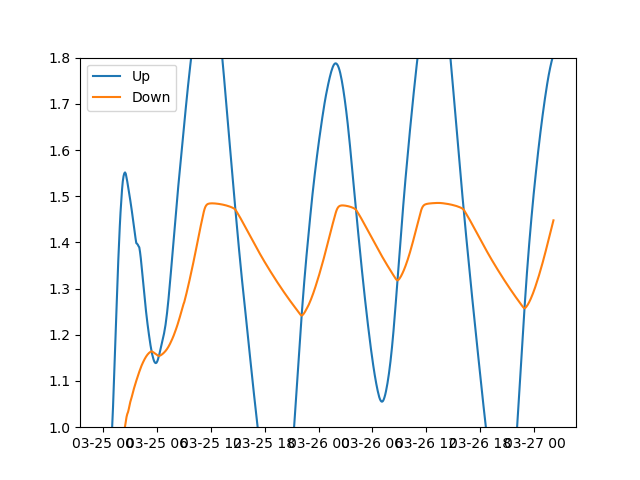

In [120]:
model=dflow_model.DFlowModel.load("runs/struct_test_v01/flowfm.mdu")

his=xr.open_dataset(model.his_output())

fig,ax=plt.subplots(1,1)
gate_i=1

ax.plot( his.time, his.gategen_s1up.isel(gategens=gate_i).values,label="Up")
ax.plot( his.time, his.gategen_s1dn.isel(gategens=gate_i).values,label="Down")
ax.axis(ymin=1.0,ymax=1.8)
ax.legend()
    

In [87]:
his.gategen_name

<xarray.DataArray 'gategen_name' (gategens: 3)>
array([b'ccs_breach', b'ccs_west', b'ccs_east'], dtype='|S64')
Coordinates:
    gategen_name  (gategens) |S64 b'ccs_breach' b'ccs_west' b'ccs_east'
Dimensions without coordinates: gategens
Attributes:
    cf_role:    timeseries_id
    long_name:  gate name